In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# DeepTICA on chignolin-multithermal

## Load

Load COLVAR

In [2]:
from stateinterpreter import load_dataframe

n_walkers = 8
kBT = 2.827
data_path = '../../../data/md_datasets/chignolin-unbiased/'
colvar_file = data_path+'COLVAR'

start,stop,stride=0,None,5
colvar = load_dataframe(colvar_file, start, stop, stride)

# set time stride
colvar['time'] = 200*colvar['time']
colvar

,time,rmsd_ca,end,hbonds,deep.node-0,deep.node-1,deep.node-2,deep.node-3,deep.node-4
0,0.0,0.067477,0.500523,3.515683,0.156591,0.269741,-0.503362,-0.769360,0.860714
1,1000.0,0.111305,0.512364,3.366620,0.036844,0.367055,0.593788,-0.725158,0.837199
2,2000.0,0.040256,0.516848,3.607478,-0.163258,0.031106,0.738618,-0.639663,0.860408
3,3000.0,0.081617,0.468477,3.491966,-0.029296,0.168578,0.801673,-0.681508,0.822269
4,4000.0,0.062648,0.460648,3.625588,-0.114638,0.244315,0.888992,-0.485358,0.901081
...,...,...,...,...,...,...,...,...,...
104944,104944000.0,0.428343,1.464966,0.604115,-0.156648,0.097244,0.012294,-0.381107,-0.555181
104945,104945000.0,0.384016,1.272258,0.586129,0.244186,0.463289,0.184388,-0.117281,-0.565599
104946,104946000.0,0.452596,1.448579,0.586075,-0.098890,0.154325,0.106024,-0.387451,-0.569581
104947,104947000.0,0.521549,1.668534,0.494104,-0.069445,0.216824,0.042331,-0.384421,-0.614793


In [3]:
from stateinterpreter import load_trajectory
from stateinterpreter.descriptors import compute_descriptors

n_walkers = 8
traj_dict = {
        'trajectory' : data_path+'CLN025-0-protein-ALL.dcd',
        'topology' : data_path+'CLN025-0-protein.pdb'
    }

start,stop,stride=0,None,5
traj = load_trajectory(traj_dict,start,stop,stride)
descriptors, feats_info = compute_descriptors( traj, descriptors = ['hbonds_distances','hbonds_contacts','dihedrals'] )

# Select descriptors 
regex_filter = 'HB_DIST'
X = descriptors.filter(regex=regex_filter).values
n_input = X.shape[1]

print(X.shape)

Computing Hydrogen bonds distances
Donors: [0, 15, 23, 36, 44, 70, 85, 91, 99, 106, 112, 120, 130, 147, 160]
Acceptors: [  0  15  22  23  36  43  44  52  53  55  56  69  70  81  82  84  85  91
  98  99 105 106 112 119 120 130 143 145 146 147 160]
Computing Hydrogen bonds contacts
Donors: [0, 15, 23, 36, 44, 70, 85, 91, 99, 106, 112, 120, 130, 147, 160]
Acceptors: [  0  15  22  23  36  43  44  52  53  55  56  69  70  81  82  84  85  91
  98  99 105 106 112 119 120 130 143 145 146 147 160]
Descriptors: (104949, 738)
(104949, 318)


Load COLVAR w/DeepTICA

In [4]:
from stateinterpreter import load_dataframe

kBT = 2.827
data_path = '../../../data/md_datasets/chignolin-unbiased/'
subfolder = 'deeptica-64-64-3-lag2000/'
colvar_file = data_path+subfolder+'COLVAR'

colvar = load_dataframe(colvar_file,start,stop,stride,**{'index_col':0})
colvar

,time,rmsd_ca,end,hbonds,deep.node-0,deep.node-1,deep.node-2,deep.node-3,deep.node-4,DeepTICA 1,DeepTICA 2,DeepTICA 3
0,0.0,0.067477,0.500523,3.515683,0.156591,0.269741,-0.503362,-0.769360,0.860714,-0.893424,0.884959,0.790053
1,1000.0,0.111305,0.512364,3.366620,0.036844,0.367055,0.593788,-0.725158,0.837199,-0.890085,0.881350,0.773990
2,2000.0,0.040256,0.516848,3.607478,-0.163258,0.031106,0.738618,-0.639663,0.860408,-0.887845,0.918662,0.789920
3,3000.0,0.081617,0.468477,3.491966,-0.029296,0.168578,0.801673,-0.681508,0.822269,-0.895155,0.911961,0.783785
4,4000.0,0.062648,0.460648,3.625588,-0.114638,0.244315,0.888992,-0.485358,0.901081,-0.921957,0.872933,0.783649
...,...,...,...,...,...,...,...,...,...,...,...,...
104944,104944000.0,0.428343,1.464966,0.604115,-0.156648,0.097244,0.012294,-0.381107,-0.555181,0.718381,0.417760,0.737886
104945,104945000.0,0.384016,1.272258,0.586129,0.244186,0.463289,0.184388,-0.117281,-0.565599,0.686467,0.446622,0.766642
104946,104946000.0,0.452596,1.448579,0.586075,-0.098890,0.154325,0.106024,-0.387451,-0.569581,0.714784,0.452321,0.782502
104947,104947000.0,0.521549,1.668534,0.494104,-0.069445,0.216824,0.042331,-0.384421,-0.614793,0.743021,0.413343,0.768492


Load TRAJ and compute descriptors

In [ ]:
from stateinterpreter import load_trajectory
from stateinterpreter.descriptors import compute_descriptors

n_walkers = 8
traj_dict = {
        'trajectory' : [data_path+f'traj_comp.{i}.xtc' for i in range(n_walkers)],
        'topology' : data_path+'chignolin-ca.pdb' if "multi" in data_path else data_path+'chignolin-ref.pdb'
    }

start,stop,stride=10000,350000,10
traj = load_trajectory(traj_dict,start,stop,stride)
descriptors, feats_info = compute_descriptors( traj, descriptors = ['hbonds_distances','hbonds_contacts','dihedrals'] )

# Select descriptors 
regex_filter = 'HB_DIST'
X = descriptors.filter(regex=regex_filter).values
n_input = X.shape[1]

print(X.shape)

Logweights

In [ ]:
#------------- PARAMETERS -------------
multicanonical    = True
temp              = 340.
temp0             = 340.
#--------------------------------------

# Calculate inverse temperature
kb=0.008314
beta=1./(kb*temp)
beta0=1./(kb*temp0)

# Extract cvs from df

t = colvar['time'].values # save time
ene = colvar['ene'].values.astype(np.float64) # store energy as long double
bias = colvar.filter(regex='.bias').values.sum(axis=1) # Load *.bias columns and sum them

# Compute log-weights for time reweighting
logweight = beta*bias

if multicanonical:
    ene -= np.mean(ene) #first shift energy by its mean value
    logweight += (beta0-beta)*ene

In [5]:
t = colvar['time'].values
logweight = None

## Compute

In [18]:
from mlcvs.utils.data import create_time_lagged_dataset, FastTensorDataLoader
from torch.utils.data import random_split

#------------- PARAMETERS -------------
lag_time = 2000
size_train  = 0.8 
#--------------------------------------

# create dataset
dataset = create_time_lagged_dataset(X,t=t,lag_time=lag_time,logweights=logweight)

# split train - valid 
n_train  = int( size_train * len(dataset) )
n_valid  = len(dataset) - n_train
train_data, valid_data = random_split(dataset,[n_train,n_valid]) 

# create dataloaders 
train_loader = FastTensorDataLoader(train_data, batch_size=len(train_data))
valid_loader = FastTensorDataLoader(valid_data, batch_size=len(valid_data))

print('Time-lagged pairs:\t',len(dataset))
print('Training data:\t\t',len(train_data))
print('Validation data:\t',len(valid_data))

Time-lagged pairs:	 524731
Training data:		 419784
Validation data:	 104947


Train CVs

In [19]:
import torch
from mlcvs.tica import DeepTICA_CV

#------------- PARAMETERS -------------
nodes             = [n_input,64,64,3]
activ_type        = 'relu'
loss_type         = 'sum2'
n_eig             = nodes[-1]

lrate             = 1e-3
l2_reg            = 0.

num_epochs        = 1000
earlystop         = True
es_patience       = 5
es_consecutive    = False

log_every         = 10
#--------------------------------------

# DEVICE
device = torch.device("cpu") #"cuda" if torch.cuda.is_available() else "cpu")

# MODEL
model = DeepTICA_CV(nodes)
model.to(device)

# OPTIMIZER
opt = torch.optim.Adam(model.parameters(), lr=lrate, weight_decay=l2_reg)

# REGULARIZATION
model.set_optimizer(opt)
model.set_earlystopping(patience=es_patience,min_delta=0.,consecutive=es_consecutive, save_best_model=True, log=False)

# TRAIN
model.fit(train_loader,valid_loader,
            standardize_inputs=True,
            standardize_outputs=True,
            loss_type=loss_type,
            n_eig=n_eig,
            nepochs=num_epochs,
            info=False, log_every=log_every)

Epoch Train Loss  Valid Loss  Eigenvalues             
10    -1.897      -1.902      0.965  0.767  0.584  
20    -2.039      -2.047      0.979  0.798  0.657  
30    -2.097      -2.103      0.983  0.812  0.684  
40    -2.131      -2.139      0.985  0.819  0.699  
50    -2.159      -2.168      0.986  0.823  0.712  
60    -2.184      -2.194      0.987  0.825  0.726  
70    -2.208      -2.219      0.987  0.827  0.739  
80    -2.228      -2.237      0.988  0.829  0.750  
90    -2.247      -2.252      0.989  0.831  0.759  
100   -2.264      -2.263      0.990  0.832  0.768  
110   -2.279      -2.272      0.990  0.833  0.776  
120   -2.293      -2.276      0.991  0.834  0.784  
INFO: Early stopping
128   -2.307      -2.276      0.991  0.835  0.791  


In [36]:
-2./np.log(0.791)

8.530337525582159

## Analyze

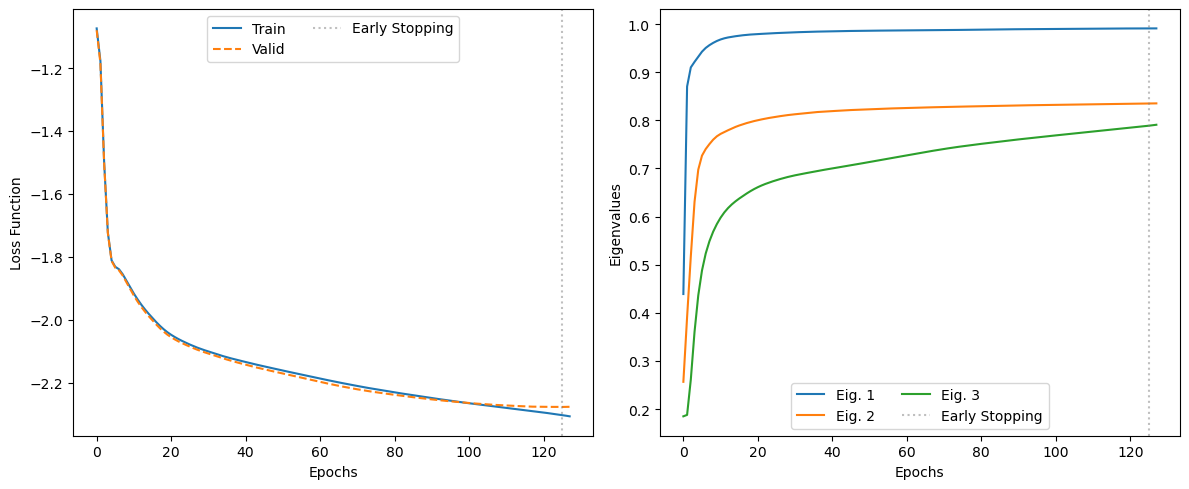

In [21]:
fig, axs = plt.subplots(1,2,figsize=(12,5),dpi=100)

loss_train = [x.cpu() for x in model.loss_train]
loss_valid = [x.cpu() for x in model.loss_valid]

# Loss function
ax = axs[0]
ax.plot(loss_train,'-',label='Train')
ax.plot(loss_valid,'--',label='Valid')
ax.set_ylabel('Loss Function')

# Eigenvalues vs epoch
ax = axs[1]
with torch.no_grad():
    evals_train = np.asarray(torch.cat(model.evals_train).cpu())
for i in range(n_eig):
    ax.plot(evals_train[:,i],label='Eig. '+str(i+1))
ax.set_ylabel('Eigenvalues')

# Common setup
for ax in axs:
    if model.earlystopping_.early_stop:
        ax.axvline(model.earlystopping_.best_epoch,ls='dotted',color='grey',alpha=0.5,label='Early Stopping')
        ax.set_xlabel('Epochs')
        ax.legend(ncol=2)

plt.tight_layout()
plt.show()

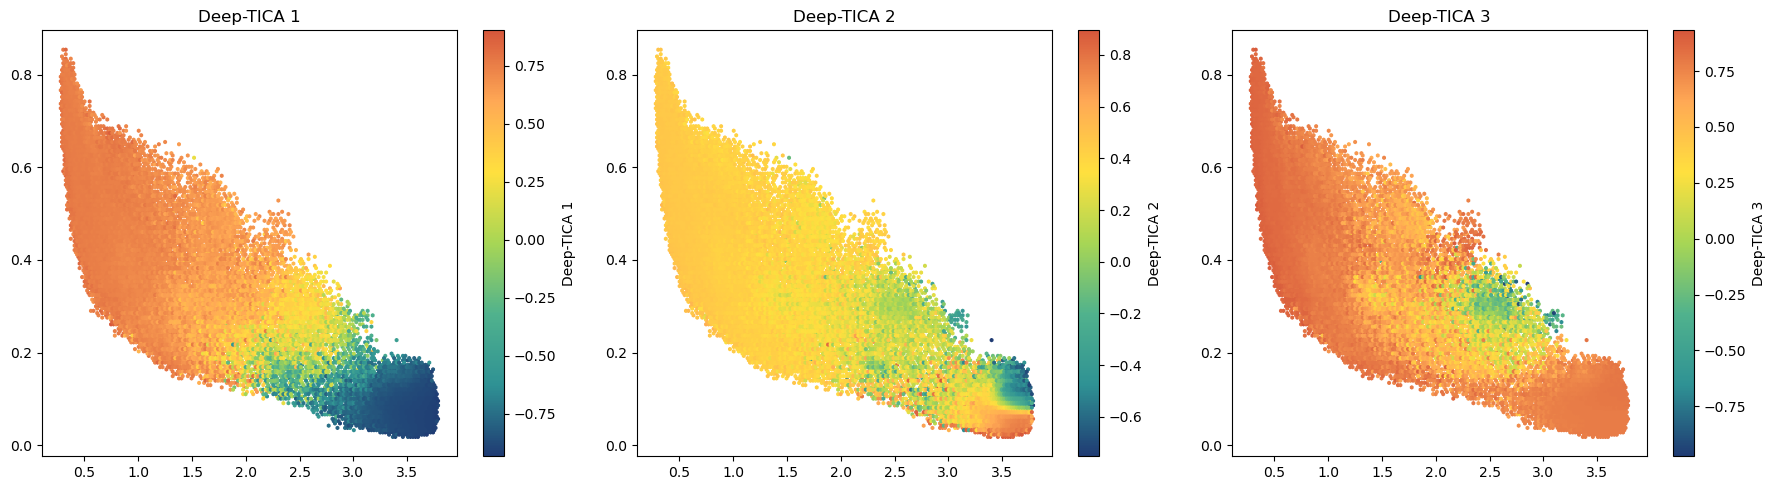

In [22]:
# Hexbin plot in physical space    
fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

x = colvar['hbonds'].values
y = colvar['rmsd_ca'].values

# compute cvs
with torch.no_grad():
    s = model(torch.Tensor(X)).numpy()
    
for i,ax in enumerate(axs):
    pp = ax.hexbin(x,y,C=s[:,i],gridsize=150,cmap='fessa')
    cbar = plt.colorbar(pp,ax=ax)
    ax.set_title('Deep-TICA '+str(i+1))
    #ax.set_xlabel(r'$\phi$ [rad]')
    #ax.set_ylabel(r'$\psi$ [rad]')
    cbar.set_label('Deep-TICA '+str(i+1))

plt.tight_layout()
plt.show()

In [ ]:
from mlcvs.utils.fes import compute_fes

fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

for i in range(n_eig):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight)+1e-24,
                                        blocks=4,
                                        bandwidth=0.02,scale_by='range',
                                        plot=True, plot_max_fes=100, ax = axs[i])
    axs[i].set_xlabel('Deep-TICA '+str(i+1))

In [23]:
# Add DeepTICA to COLVAR
with torch.no_grad():
    s = model(torch.Tensor(X)).numpy()

for i in range(n_eig):
    colvar[f'DeepTICA {i+1}'] = s[:,i]

colvar

,time,rmsd_ca,end,hbonds,deep.node-0,deep.node-1,deep.node-2,deep.node-3,deep.node-4,DeepTICA 1,DeepTICA 2,DeepTICA 3
0,0.0,0.067477,0.500523,3.515683,0.156591,0.269741,-0.503362,-0.769360,0.860714,-0.893424,0.884959,0.790053
1,200.0,0.061440,0.484817,3.683994,0.075119,0.174272,-0.634286,-0.760994,0.902211,-0.914111,0.877902,0.788599
2,400.0,0.073747,0.529122,3.543214,0.193874,0.186728,-0.640651,-0.788809,0.896364,-0.882414,0.857633,0.784630
3,600.0,0.064288,0.510617,3.600774,0.051151,0.165240,-0.497756,-0.706990,0.912424,-0.915752,0.835920,0.780646
4,800.0,0.054643,0.490646,3.625981,-0.146400,0.154118,-0.039738,-0.762542,0.921258,-0.873738,0.910101,0.785963
...,...,...,...,...,...,...,...,...,...,...,...,...
524738,104947600.0,0.478311,1.651978,0.570308,-0.167770,0.223860,0.019220,-0.323049,-0.688729,0.793542,0.514627,0.853657
524739,104947800.0,0.455442,1.574470,0.707172,-0.159069,0.001862,-0.030138,-0.350535,-0.686813,0.707554,0.467553,0.816480
524740,104948000.0,0.595281,1.987051,0.423479,-0.207653,0.227339,0.048673,-0.407225,-0.649493,0.719769,0.487988,0.844249
524741,104948200.0,0.508557,1.747549,0.514254,-0.277042,0.402179,-0.095259,-0.205230,-0.602700,0.770134,0.463345,0.844159


In [24]:
from pathlib import Path
save_folder = data_path+'deeptica-64-64-3-lag2000/'
Path(save_folder).mkdir(parents=True, exist_ok=True)

colvar.to_csv(save_folder+'COLVAR')
model.export(save_folder)

## Evaluate CVs on new traj

In [ ]:
from stateinterpreter import load_dataframe

n_walkers = 8
kBT = 2.827
data_path = '../../../data/md_datasets/chignolin-biased/'
colvar_file = [data_path+f'COLVAR.{i}' for i in range(n_walkers)]

start,stop,stride=10000,350000,10
colvar = load_dataframe(colvar_file, start, stop, stride) #.drop(['idx', 'time'], axis=1)

# increase time per walker
offset = 350000
colvar['time'] = colvar['time']+offset*colvar['walker']
colvar

In [ ]:
from stateinterpreter import load_trajectory
from stateinterpreter.descriptors import compute_descriptors

traj_dict = {
        'trajectory' : [data_path+f'traj_comp.{i}.xtc' for i in range(n_walkers)],
        'topology' : data_path+'chignolin-ref.pdb'
    }

traj = load_trajectory(traj_dict,start,stop,stride)
descriptors, feats_info = compute_descriptors( traj, descriptors = ['hbonds_distances','hbonds_contacts','dihedrals'] )

# Select descriptors 
X2 = descriptors.filter(regex='HB_DIST').values
n_input = X2.shape[1]

print(X2.shape)

In [ ]:
#------------- PARAMETERS -------------
multicanonical    = True
temp              = 340.
temp0             = 340.
#--------------------------------------

# Calculate inverse temperature
kb=0.008314
beta=1./(kb*temp)
beta0=1./(kb*temp0)

# Extract cvs from df

t = colvar['time'].values # save time
ene = colvar['ene'].values.astype(np.float64) # store energy as long double
bias = colvar.filter(regex='.bias').values.sum(axis=1) # Load *.bias columns and sum them

# Compute log-weights for time reweighting
logweight = beta*bias

if multicanonical:
    ene -= np.mean(ene) #first shift energy by its mean value
    logweight += (beta0-beta)*ene

Load model

In [ ]:
import torch
from mlcvs.tica import DeepTICA_CV

#------------- PARAMETERS -------------
nodes             = [n_input,64,64,3]
activ_type        = 'relu'
loss_type         = 'sum2'
n_eig             = nodes[-1]

lrate             = 1e-3
l2_reg            = 0.

num_epochs        = 1000
earlystop         = True
es_patience       = 5
es_consecutive    = False

log_every         = 10
#--------------------------------------

# DEVICE
device = torch.device("cpu") #"cuda" if torch.cuda.is_available() else "cpu")

# MODEL
model = DeepTICA_CV(nodes)
model.to(device)

# OPTIMIZER
opt = torch.optim.Adam(model.parameters(), lr=lrate, weight_decay=l2_reg)

# REGULARIZATION
model.set_optimizer(opt)
model.set_earlystopping(patience=es_patience,min_delta=0.,consecutive=es_consecutive, save_best_model=True, log=False)

model_folder = '/home/lbonati@iit.local/work/data/md_datasets/chignolin-multi/deeptica-64-64-3-lag50/'
model.load_checkpoint(model_folder+'model_checkpoint.pt')
model.standardize_inputs(torch.Tensor(X))
model.standardize_outputs(torch.Tensor(X))

In [ ]:
# Add DeepTICA to COLVAR
with torch.no_grad():
    s = model(torch.Tensor(X2)).numpy()

for i in range(n_eig):
    colvar[f'DeepTICA {i+1}'] = s[:,i]

colvar

In [ ]:
# Hexbin plot in physical space    
fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

x = colvar['hbonds'].values
y = colvar['rmsd_ca'].values

# compute cvs
with torch.no_grad():
    s = model(torch.Tensor(X2)).numpy()
    
for i,ax in enumerate(axs):
    pp = ax.hexbin(x,y,C=s[:,i],gridsize=150,cmap='fessa')
    cbar = plt.colorbar(pp,ax=ax)
    ax.set_title('Deep-TICA '+str(i+1))
    #ax.set_xlabel(r'$\phi$ [rad]')
    #ax.set_ylabel(r'$\psi$ [rad]')
    cbar.set_label('Deep-TICA '+str(i+1))

plt.tight_layout()
plt.show()

In [ ]:
from mlcvs.utils.fes import compute_fes

fig,axs = plt.subplots(1,n_eig,figsize=(6*n_eig,5),dpi=100)

for i in range(n_eig):
    fes,grid,bounds,error = compute_fes(s[:,i], weights=np.exp(logweight)+1e-24,
                                        blocks=4,
                                        bandwidth=0.02,scale_by='range',
                                        plot=True, plot_max_fes=100, ax = axs[i])
    axs[i].set_xlabel('Deep-TICA '+str(i+1))

In [ ]:
from pathlib import Path
save_folder = data_path+'deeptica-64-64-3-lag50/biased_rerun/'
Path(save_folder).mkdir(parents=True, exist_ok=True)

colvar.to_csv(save_folder+'COLVAR')

# Stateinterpreter

Functions

In [6]:
from stateinterpreter.utils.numerical_utils import gaussian_kde

def plot_fes(cv,bandwidth,states_labels=None,logweights=None,kBT=2.5,cv_list=None,states_subset=None,num_samples=100,ax=None,prefix_label=""):
    
    if cv_list is not None:
        cv = cv[cv_list]

    empirical_centers = cv.to_numpy()
    KDE = gaussian_kde(empirical_centers,bandwidth,logweights)

    bounds = [(x.min(), x.max()) for x in KDE.dataset.T]
    mesh = np.meshgrid(*[np.linspace(b[0], b[1], num_samples) for b in bounds])

    positions = np.vstack([g.ravel() for g in mesh]).T
    fes = -kBT*KDE.logpdf(positions)
    fes -= fes.min()
    if ax is None:
        fig,ax = plt.subplots()
    ax.plot(mesh[0],fes/kBT,color='dimgrey',linewidth=2)
    ax.set_xlabel(cv.columns.values[0])
    ax.set_ylabel('FES [$k_B$T]')
    ax.set_xlim(bounds[0][0],bounds[0][1])
    ax.set_ylim(0,)
    
    if states_labels is not None:
        if states_subset is not None:
            labels = states_subset
        else:
            labels = sorted(states_labels['labels'].unique())
        for i in labels:
            mask = ( states_labels['labels'] == i ) & (states_labels['selection'] == True )
            Min = cv[mask].min().values[0] 
            Max = cv[mask].max().values[0] 
            ax.axvspan(Min,Max, alpha=0.5, color=f'fessa{6-i}')
            ax.text((Max+Min)/2,1,prefix_label+str(i),fontsize=14,ha='center')

def get_best_reg(classifier):
    num = []
    for reg in classifier._reg:
        # get number of features
        selected = classifier._get_selected(reg, feature_mode=False)
        unique_idxs = set()
        for state in selected.values():
            for data in state:
                unique_idxs.add(data[0])
        num.append(len(unique_idxs)) 

    # accuracy
    acc = classifier._crossval

    # criterion
    score = (1-acc)*100+num

    # return reg which minimizes it
    best_reg = np.argmin(score)
    return classifier._reg[best_reg],acc[best_reg],num[best_reg]

In [7]:
def train(cv_list,mask=None,base_state="",merge_states=None,states_subset=None):
    if mask is not None:
        # apply mask
        cv = colvar[mask].reset_index()
        desc = descriptors[mask].reset_index()
        logw = None
        if logweights is not None:
            logw = logweights[mask]
            if type(logw) == pd.DataFrame:
                logw = logw.reset_index()
    else:
        cv = colvar
        desc = descriptors
        logw = logweights

    # filter HB-descriptors
    # Select only contacts which are greater than 0.5 at least once for these states
    if filter_descriptors:
        selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
        desc = desc[selected.index[selected]]
        print('Filtering H-bonds:',desc.shape)

    # identify states
    states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, logweights=logw, fes_cutoff=kBT, gradient_descent_iterates=gradient_descent_iterates)
    # merge states if requested 
    if merge_states is not None:
        for pair in merge_states:
            states_labels.loc[states_labels['labels'] == pair[1], 'labels'] = pair[0]
    
    # count states
    if states_subset is None:
        num_states = len(states_labels['labels'].unique())
    else:
        num_states = len(states_subset)
    num_histo = num_states if num_states>2 else 1
    
    # plot setup
    if num_states == 1:
        fig,ax = plt.subplots(figsize=(4.5,3))
    else:
        #fig,axs = plt.subplots(1,2,figsize=(7.5,5))
        fig = plt.figure(figsize=(13.5,3), constrained_layout=True)
        gs = matplotlib.gridspec.GridSpec(num_histo, 3, figure=fig)
        ax1 = fig.add_subplot(gs[:, 0])
        ax2 = fig.add_subplot(gs[:, 1])
        axs_histo = []
        for i in range(num_histo):
            axs_histo.append(fig.add_subplot(gs[i, 2]))
        ax = ax1
        
    plot_fes(cv[cv_list],bandwidth,states_labels,logweights=logw,num_samples=200,states_subset=states_subset,prefix_label=base_state+'.' if len(base_state)>0 else "",ax=ax)
    
    if len(base_state) > 0 :
        ax.set_title( f'State {base_state}' )

    if num_states > 1 :

        # classify
        if states_subset is not None:
            state_names = [f'{base_state}.{i}' for i in states_subset ]
        else:
            state_names = [f'{base_state}.{i}' for i in sorted(states_labels['labels'].unique()) ]
        sample_obj, features_names, classes_names = prepare_training_dataset(desc, states_labels, num_samples, regex_filter=select_feat, states_names=state_names,states_subset=states_subset) 
        classifier = Classifier(sample_obj, features_names, classes_names)
        classifier.compute(regularizers, max_iter= 10000) #, groups=groups)

        # get best reg
        reg,acc,num = get_best_reg(classifier)

        # plot
        ax = ax2
        _, ax_twin = plot_classifier_complexity_vs_accuracy(classifier, ax = ax)
        ax.axvline(np.log10(reg),linestyle='dotted',color='k')
        ax.text(np.log10(reg)+0.02,acc+.05,f'{np.round(acc*100,1)}%',fontsize=12,color='fessa0')
        ax_twin.text(np.log10(reg)+0.02,num+0.5,f'{num}',fontsize=12,color='fessa1')

        #print features
        print('Regularization --> log_10 (lambda) = ',np.round(np.log10(reg),3))
        classifier.print_selected(reg)

        relevant_feat = classifier.feature_summary(reg)
        plot_histogram_features(desc, states_labels, classes_names, relevant_feat, axs = axs_histo, height=1)

        #plt.tight_layout()
    if save_folder is not None:
        plt.savefig(save_folder+f'deeptica{cv_list[0][-1]}_state{base_state}_{feat_type}.png', bbox_inches='tight')


Parameters

In [10]:
import matplotlib
from stateinterpreter import identify_metastable_states,prepare_training_dataset,Classifier
from stateinterpreter.utils.plot import plot_classifier_complexity_vs_accuracy,plot_histogram_features

regularizers = np.geomspace(0.01, 1, 51)

logweights = None
num_samples = 5000
bandwidth = 0.1
data_path = '../../../data/md_datasets/chignolin-unbiased/'
save_folder = data_path+'deeptica-64-64-3-lag2000/'
gradient_descent_iterates = 0

In [11]:
# HBONDS
feat_type = 'hbonds'
select_feat = 'HB_CONT'
filter_descriptors = True

In [17]:
# ANGLES
feat_type = 'angles'
select_feat = 'sin_|cos_'
filter_descriptors = False 

In [ ]:
# BOTH
feat_type =  'both' 
select_feat =  'sin_|cos_|HB_CONT'
filter_descriptors = False

## TICA 1

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 2 local minima with selected populations:
	Basin 0 -> 81122 configurations.
	Basin 1 -> 21061 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 74.88it/s]


Regularization --> log_10 (lambda) =  -0.84
Accuracy: 97%
State .1:
 SIDECHAIN cos_chi1 ASP3


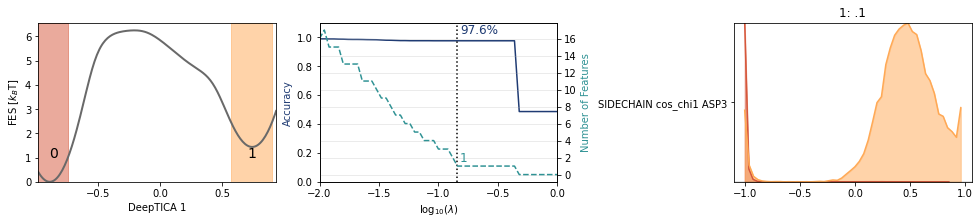

In [18]:
base_state = ""
cv_list = ['DeepTICA 1']
mask = None
train(cv_list,mask,base_state)

## TICA 2

### State 0

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 4 local minima with selected populations:
	Basin 0 -> 14051 configurations.
	Basin 1 -> 9480 configurations.
	Basin 2 -> 6431 configurations.
	Basin 3 -> 50704 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:02<00:00, 21.30it/s]


Regularization --> log_10 (lambda) =  -0.52
Accuracy: 86%
State 0.3:
 SIDECHAIN sin_chi1 THR6


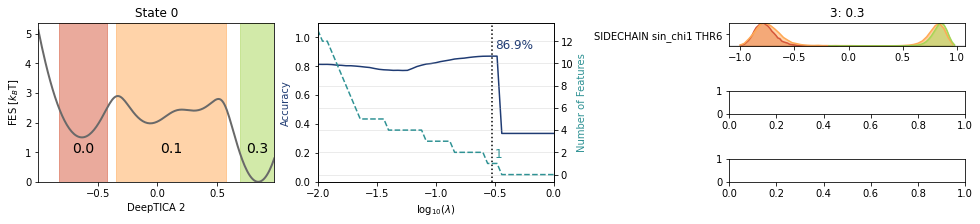

In [19]:
base_state= "0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.25
train(cv_list,mask,base_state,merge_states=[[1,2]],states_subset=[0,1,3])

### State 0 (0.0 vs 0.1)

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 4 local minima with selected populations:
	Basin 0 -> 14051 configurations.
	Basin 1 -> 9480 configurations.
	Basin 2 -> 6431 configurations.
	Basin 3 -> 50704 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 64.54it/s]


Regularization --> log_10 (lambda) =  -0.36
Accuracy: 100%
State b-0.3:
 SIDECHAIN sin_chi1 THR6


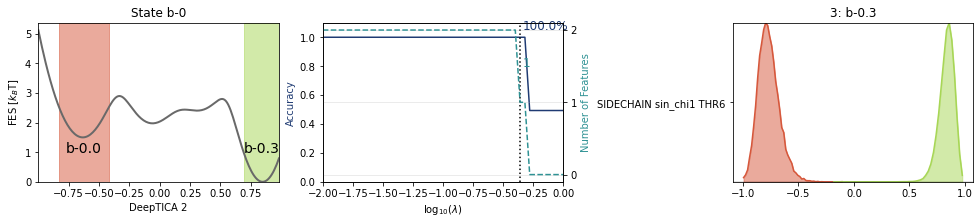

In [20]:
base_state= "b-0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.25
train(cv_list,mask,base_state,merge_states=[[1,2]],states_subset=[0,3])

### State 0 (0.0 vs 0.2)

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 4 local minima with selected populations:
	Basin 0 -> 14051 configurations.
	Basin 1 -> 9480 configurations.
	Basin 2 -> 6431 configurations.
	Basin 3 -> 50704 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 88.70it/s]


Regularization --> log_10 (lambda) =  -1.68
Accuracy: 99%
State a-0.3:
 SIDECHAIN sin_chi1 THR6
 SIDECHAIN cos_chi1 THR8


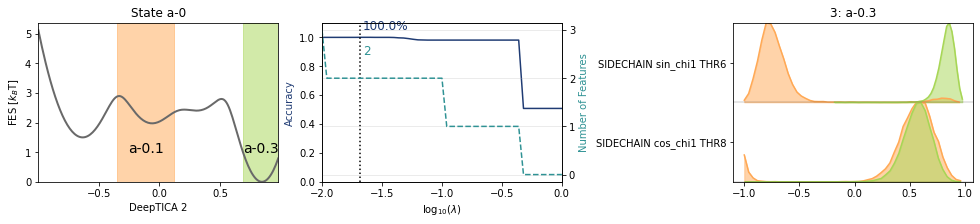

In [21]:
base_state= "a-0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.25
train(cv_list,mask,base_state,states_subset=[1,3])

### 0.1 vs 0.2

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 4 local minima with selected populations:
	Basin 0 -> 14051 configurations.
	Basin 1 -> 9480 configurations.
	Basin 2 -> 6431 configurations.
	Basin 3 -> 50704 configurations.


Optimizing Lasso Estimator: 100%|██████████| 51/51 [00:00<00:00, 86.34it/s]


Regularization --> log_10 (lambda) =  -1.28
Accuracy: 92%
State c-0.2:
 SIDECHAIN sin_chi1 THR6


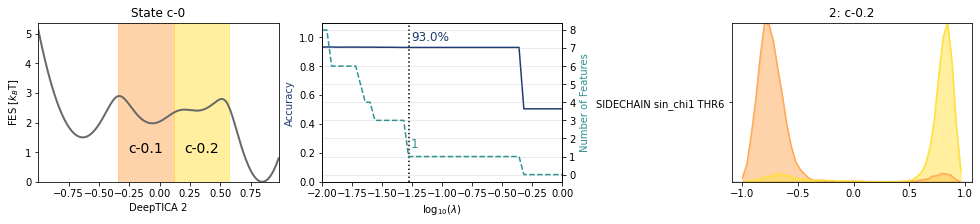

In [22]:
base_state= "c-0"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] < -0.25
train(cv_list,mask,base_state,states_subset=[1,2])

### State 1

Filtering H-bonds: (22974, 256)
DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 1 local minima with selected populations:
	Basin 0 -> 21754 configurations.


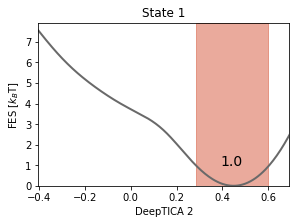

In [31]:
base_state = "1"
cv_list = ['DeepTICA 2']
mask = colvar['DeepTICA 1'] > -0.25
train(cv_list,mask,base_state)

## TICA 3

### State 0.0

Filtering H-bonds: (51295, 100)
DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 1 local minima with selected populations:
	Basin 0 -> 51294 configurations.


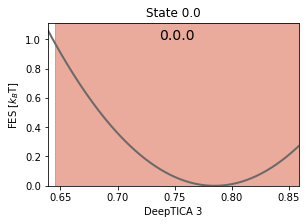

In [32]:
base_state = "0.0"
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.25 ) & ( colvar['DeepTICA 2'] > 0.6)

#old_bandwidth=bandwidth
#bandwidth=0.1
train(cv_list,mask,base_state)#,merge_states=[[1,2]])
#bandwidth = old_bandwidth

In [ ]:
base_state = "0.1"
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 ) & (colvar['DeepTICA 2'] > -0.35) & ( colvar['DeepTICA 2'] < 0.5) 
train(cv_list,mask,base_state,merge_states=[[0,1],[2,3],[2,4]],states_subset=[0,2])

### State 0.2

In [ ]:
base_state = "0.2"
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 ) & ( colvar['DeepTICA 2'] > 0.5 )
train(cv_list,mask,base_state,merge_states=[[1,2]],states_subset=[0,1])

### State 1.0

In [ ]:
base_state = "1.0"

# filter colv
cv_list = ['DeepTICA 3']
mask = ( colvar['DeepTICA 1'] > -0.6 )
cv = colvar[mask].reset_index()
desc = descriptors[mask].reset_index()

# filter HB-descriptors
# Select only contacts which are greater than 0.5 at least once for these states
if filter_descriptors:
    selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
    desc = desc[selected.index[selected]]
    print('Filtering H-bonds:',desc.shape)
    
# bandwitdth
#bandwidth = 0.05

# identify states
#states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, fes_cutoff=kBT)
plot_fes(cv[cv_list],bandwidth,states_labels=None,num_samples=200,prefix_label=base_state+'.')

##  TICA 23 (state 0)

In [ ]:
base_state = "0"

# filter colv
cv_list = ['DeepTICA 2','DeepTICA 3']
mask = ( colvar['DeepTICA 1'] < -0.55 )
cv = colvar[mask].reset_index()
desc = descriptors[mask].reset_index()

# filter HB-descriptors
# Select only contacts which are greater than 0.5 at least once for these states
if filter_descriptors:
    selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
    desc = desc[selected.index[selected]]
    print('Filtering H-bonds:',desc.shape)
    
# bandwitdth
# bandwidth = 0.1

# identify states
states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, fes_cutoff=kBT)

In [ ]:
from stateinterpreter.utils.plot import plot_states

plot_states(cv, states_labels, cv_list, fes_isolines=True, bandwidth=bandwidth, cmap_name='fessa')

## TICA 3 (state 0)

In [ ]:
base_state = "0.-"

# filter colv
cv_list = ['DeepTICA 3']
mask = colvar['DeepTICA 1'] < -0.55
cv = colvar[mask].reset_index()
desc = descriptors[mask].reset_index()

# filter HB-descriptors
# Select only contacts which are greater than 0.5 at least once for these states
if filter_descriptors:
    selected = ((desc.filter(regex='HB_CONTACT')>0.5).sum()>0)
    desc = desc[selected.index[selected]]
    print('Filtering H-bonds:',desc.shape)

# bandwitdth
#bandwidth = 0.05

# identify states
states_labels = identify_metastable_states(cv, cv_list, kBT, bandwidth, fes_cutoff=kBT)
plot_fes(cv[cv_list],bandwidth,states_labels,num_samples=200,prefix_label=base_state+'.')

In [ ]:
from stateinterpreter import prepare_training_dataset,Classifier

regularizers = np.geomspace(0.01, 1, 51)
select_feat = 'HB_CONT'
state_names = [f'{base_state}.{i}' for i in range(len(states_labels['labels'].unique())) ]
sample_obj, features_names, classes_names = prepare_training_dataset(desc, states_labels, 10000, regex_filter=select_feat, states_names=state_names) 
                                                    #states_subset=states_subset, )
classifier = Classifier(sample_obj, features_names, classes_names)
classifier.compute(regularizers, max_iter= 10000) #, groups=groups)

classifier.plot();

In [ ]:
from stateinterpreter.utils.plot import plot_histogram_features
import matplotlib.pyplot as plt 

reg = 10**(-0.5)
classifier.print_selected(reg)

relevant_feat = classifier.feature_summary(reg)
plot_histogram_features(desc, states_labels, classes_names, relevant_feat, height=1.5)